# I. Set Up

In [96]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import glob
import os
import ipywidgets as widgets
from IPython.display import clear_output
import sys
import time
import json
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import umap
import seaborn as sns
import fnmatch
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
from sherpa.astro import ui
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
# CUSTOM Imports
from data_extraction_functions import *
from data_exploration_functions import *
from data_representation_functions import *

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Custom object hook to convert lists of lists to NumPy arrays
def numpy_hook(obj):
    if isinstance(obj, list):
        # Check if the list contains sublists (i.e. a matrix)
        if isinstance(obj[0], list):
            # Convert the list of lists to a NumPy array matrix
            return np.array(obj)
    # Return all other objects as is
    return obj

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', options=('All', 'Bona'), value='All')

# II. Load Data

In [97]:
# Set ID
set_id = set_widget.value
files = os.listdir(f'{global_path}/{set_id}/')
input_files = [f for f in files if fnmatch.fnmatch(f, 'hist*nE16*.pkl')]
input_widget = widgets.Dropdown(options=input_files[:],value=input_files[0],description='Histogram File :',disabled=False); input_widget



Dropdown(description='Histogram File :', options=('hist2D-All-nE16-nt24-normnone.pkl', 'hist3D-All-nE16-nt24-n…

In [98]:
# Load the DataFrame from the CSV file
input_file = input_widget.value
# Load histogram dictionary
with open(f'{global_path}/{set_id}/{input_file}', 'rb') as f:
    hist_dict = pickle.load(f)
# Flatten histograms in the dictionary and get IDs
ids = hist_dict.keys()
histograms = hist_dict.values()
features = np.array([np.array(h).flatten() for h in histograms])
features[np.isnan(features)] = 0.0
# Load properties
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')
df_properties_input = df_properties_input[df_properties_input['obsreg_id'].isin(list(ids))]
df_properties = df_properties_input.drop_duplicates('obsreg_id', keep='first').reset_index()
#Load eventfiles
df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id}.csv')
df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

# print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
# print("Number of Property Sets: ", df_properties_group.ngroups)

# Print eventfiles and properties number of IDs
print("Number of Features: ", len(features))
print("Number of Property Sets: ", len(df_properties))

Number of Features:  82283
Number of Property Sets:  82283


# III. Display

SHOW

In [136]:
# Load DBSCAN RESULT
files = os.listdir(f'{global_path}/{set_id}/')
dbscan_files = [f for f in files if fnmatch.fnmatch(f, 'DBSCANres*csv')]
dbscan_widget = widgets.Dropdown(options=dbscan_files[:],value=dbscan_files[0],description='TSNE File :',disabled=False); dbscan_widget

Dropdown(description='TSNE File :', options=('DBSCANres-All-tsne-All-hist3D-All-nE16-nt24-ndt24-normnone-2D-pe…

In [137]:
# Load the DataFrame from the CSV file
dbscan_file = dbscan_widget.value
df_tsne_filter = pd.read_csv(f'{global_path}/{set_id}/{dbscan_file}')
df_tsne_filter = df_tsne_filter.sort_values(by='cluster', ascending=True) 

#####SELECTED ANOMALIES
dip_in_blip = ['14431_16']
dips_select = ['10783_10','10871_10','11059_10','9070_10','9072_10','11272_13','10783_10','13682_9','1708_192','1708_193','1712_91','15553_237','13681_9','13813_86','11988_38','13814_586','13812_586','13828_596','13828_46']
dips_maybe = ['12992_101','12995_101','13814_586','13813_218','13814_237','13828_596']
flares_select = ['10542_331','4395_992','2227_220','16444_1025','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','9109_333','9109_344','13637_1078','14368_489','1042_24','11016_168','11737_157','12390_136']
flares_maybe = ['10542_331','10556_6687','10556_5752','10556_6687']
rosanne = ['13814_567']
lin = ['4062_31', '13454_56']
irwin = ['3926_13','7800_4','7799_16','8490_30']

tsne_flares = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(flares_select)]
tsne_dips = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(dips_select)]
tsne_rosanne = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(rosanne)]
tsne_lin_irwin = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(lin + irwin)]

anomalies = pd.concat([tsne_flares, tsne_dips, tsne_rosanne, tsne_lin_irwin])
anomalies.head(50)

,tsne1,tsne2,obsreg_id,cluster
6904,49.518555,-8.993011,11737_157,2
37124,49.701030,-18.157728,2833_53,2
3184,49.920430,-13.451853,10822_185,2
1084,48.766342,-13.825297,1042_24,2
30212,101.019830,4.628109,16444_1025,3
22400,99.531710,11.653706,14368_489,3
23476,88.094570,1.808135,14542_18,3
22938,99.820780,2.247931,14431_16,3
1923,96.615360,2.565759,10542_331,3
16677,93.968470,14.307055,13610_112,3


[-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


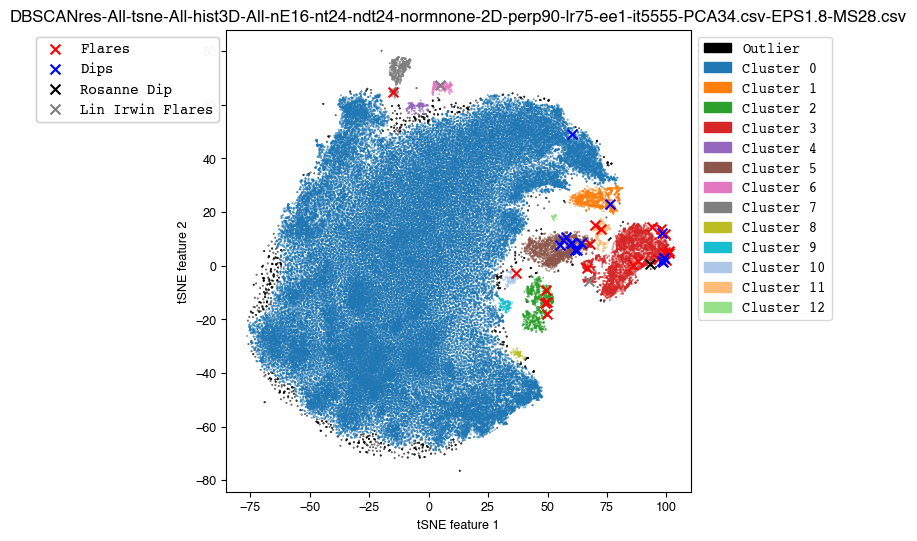

In [138]:
# PLOT
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
colors = ['black',
    '#1f77b4',  # blue
    '#ff7f0e',  # orange
    '#2ca02c',  # green
    '#d62728',  # red
    '#9467bd',  # purple
    '#8c564b',  # brown
    '#e377c2',  # pink
    '#7f7f7f',  # gray
    '#bcbd22',  # olive
    '#17becf',  # teal
    '#aec7e8',  # light blue
    '#ffbb78',  # light orange
    '#98df8a',  # light green
    '#ff9896',  # light red
    '#c5b0d5',  # light purple
    '#c49c94',  # light brown
    '#f7b6d2',  # light pink
    '#c7c7c7',  # light gray
    '#dbdb8d',  # light olive
    '#9edae5',  # light teal
    '#1b9e77',  # dark green
    '#d95f02',  # dark orange
    '#7570b3',  # dark purple
    '#e7298a',  # dark pink
    '#66a61e',  # dark olive
    '#e6ab02',  # dark yellow
    '#a6761d',  # dark brown
    '#666666',  # dark gray
    '#a6cee3',  # pale blue
    '#fdbf6f',  # pale orange
    '#fb9a99',  # pale red
    '#b2df8a',  # pale green
    '#cab2d6',  # pale purple
    '#ffff99'   # pale yellow
]
cmap = ListedColormap(colors[:len(df_tsne_filter['cluster'].unique())])

# Create custom legend handles for clusters
unique_labels = df_tsne_filter['cluster'].unique()
print(unique_labels)
cluster_legend_handles = []
for i in range(len(unique_labels)):
    if i > 0:
        label = 'Cluster ' + str(unique_labels[i])
        color = colors[i % len(colors)]
        cluster_legend_handles.append(mpatches.Patch(color=color, label=label))
    else:
        label = 'Outlier'
        color = colors[i % len(colors)]
        cluster_legend_handles.append(mpatches.Patch(color=color, label=label))

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.monospace'] = "Courier"
plt.rcParams["font.family"] = "monospace"
cluster = axs.scatter(df_tsne_filter['tsne1'], df_tsne_filter['tsne2'], s=0.1, c=df_tsne_filter['cluster'], cmap=cmap)
axs.set_xlabel('tSNE feature 1')
axs.set_ylabel('tSNE feature 2')
axs.scatter(tsne_flares['tsne1'], tsne_flares['tsne2'], c='red', marker='x', s=50, label='Flares')
axs.scatter(tsne_dips['tsne1'], tsne_dips['tsne2'], c='blue', marker='x', s=50, label='Dips')
axs.scatter(tsne_rosanne['tsne1'], tsne_rosanne['tsne2'], c='black', marker='x', s=50, label='Rosanne Dip')
axs.scatter(tsne_lin_irwin['tsne1'], tsne_lin_irwin['tsne2'], c='grey', marker='x', s=50, label='Lin Irwin Flares')
axs.set_title(dbscan_file)

# Combine both legends into a single legend
cluster_legend = axs.legend(handles=cluster_legend_handles, bbox_to_anchor=(1, 1), loc='upper left')
anomaly_legend = axs.legend(bbox_to_anchor=(0, 1), loc='upper right')  # No handles and labels are passed to create the second legend

# Add both legends to the plot
axs.add_artist(cluster_legend)
axs.add_artist(anomaly_legend)

plt.show()


Text(0.5, 1.0, 'DBSCANres-All-tsne-All-hist2D-All-nE16-nt24-normnone-2D-perp80-lr100-ee1-it5432-initrandom-PCA20.csv-EPS1.5-MS25.csv')

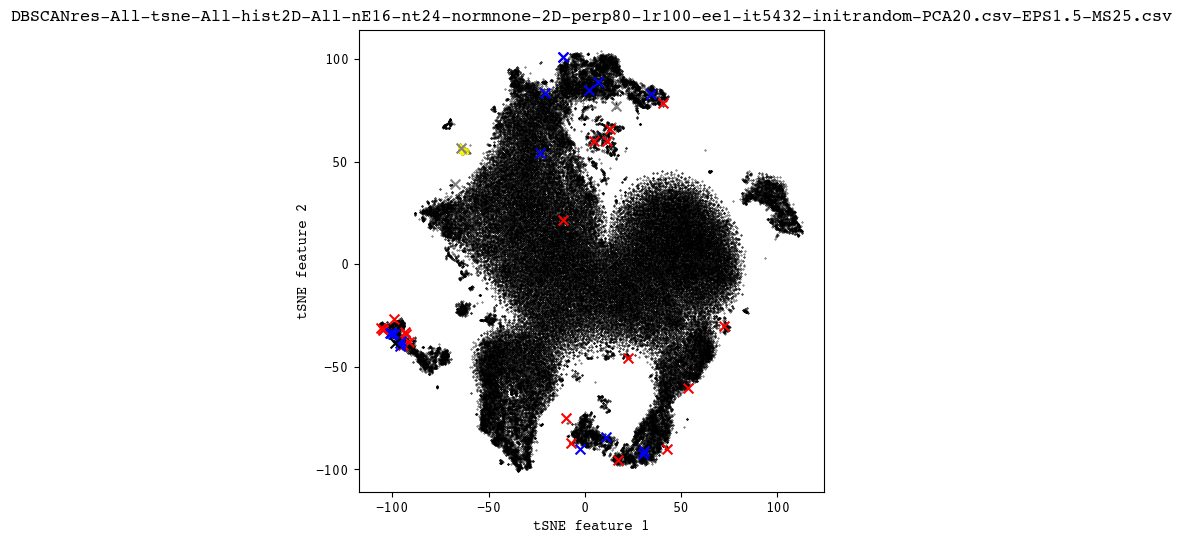

In [125]:
select_clusters = [7]#range(0,10) #[3035] #12,13
df_select = df_tsne_filter[df_tsne_filter['cluster'].isin(select_clusters)]

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.monospace'] = "Courier"
plt.rcParams["font.family"] = "monospace"
rej = axs.scatter(df_tsne_filter['tsne1'], df_tsne_filter['tsne2'], s=0.1, c='black', label = 'Rejected Clusters')
acc = axs.scatter(df_select['tsne1'], df_select['tsne2'], s=0.1, c='yellow', label = 'Chosen Clusters')
axs.set_xlabel('tSNE feature 1')
axs.set_ylabel('tSNE feature 2')
axs.scatter(tsne_flares['tsne1'], tsne_flares['tsne2'], c='red', marker='x', s=50, label='Flares')
axs.scatter(tsne_dips['tsne1'], tsne_dips['tsne2'], c='blue', marker='x', s=50, label='Dips')
axs.scatter(tsne_rosanne['tsne1'], tsne_rosanne['tsne2'], c='black', marker='x', s=50, label='Rosanne Dip')
axs.scatter(tsne_lin_irwin['tsne1'], tsne_lin_irwin['tsne2'], c='grey', marker='x', s=50, label='Lin Irwin Flares')
axs.set_title(dbscan_file)

Lightcurves

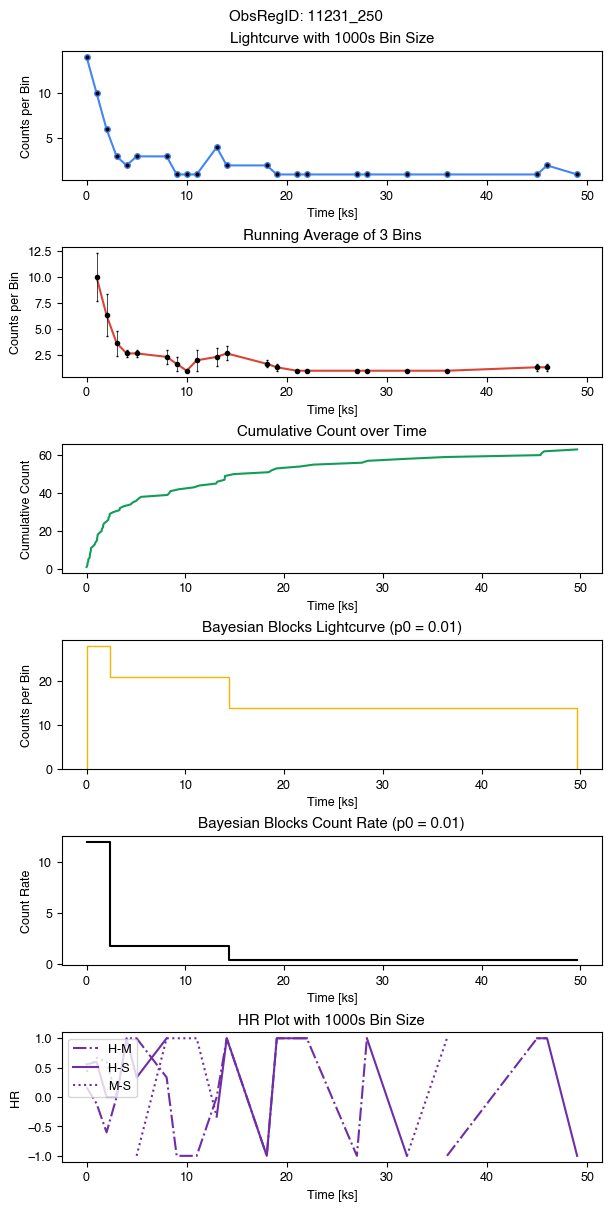

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


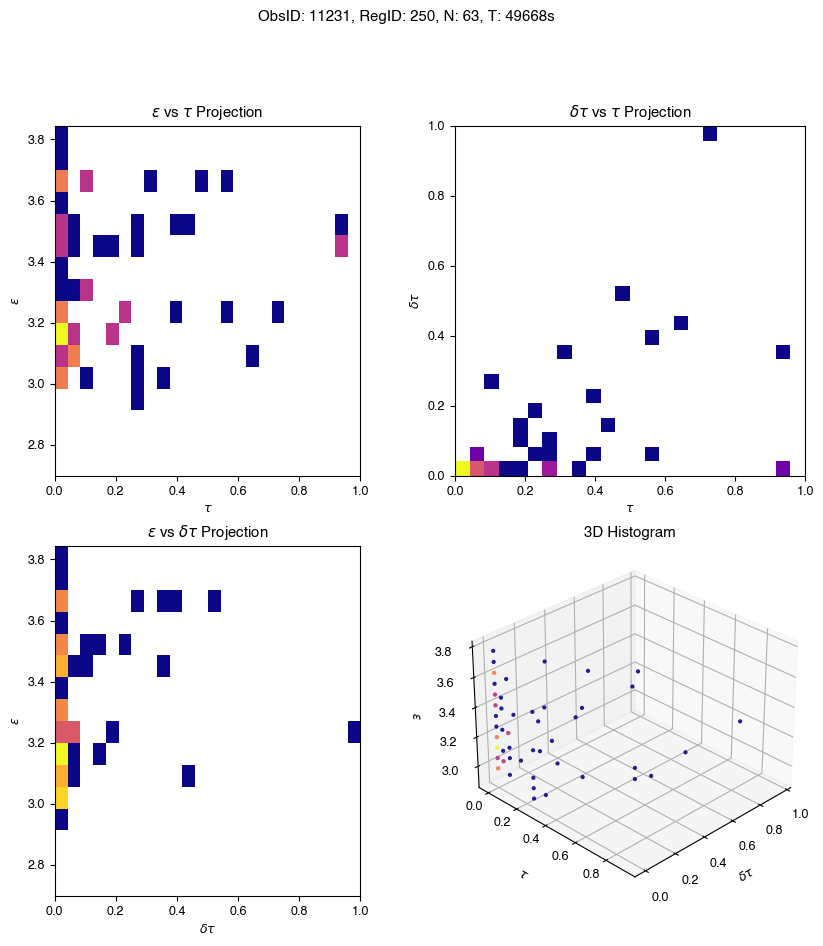

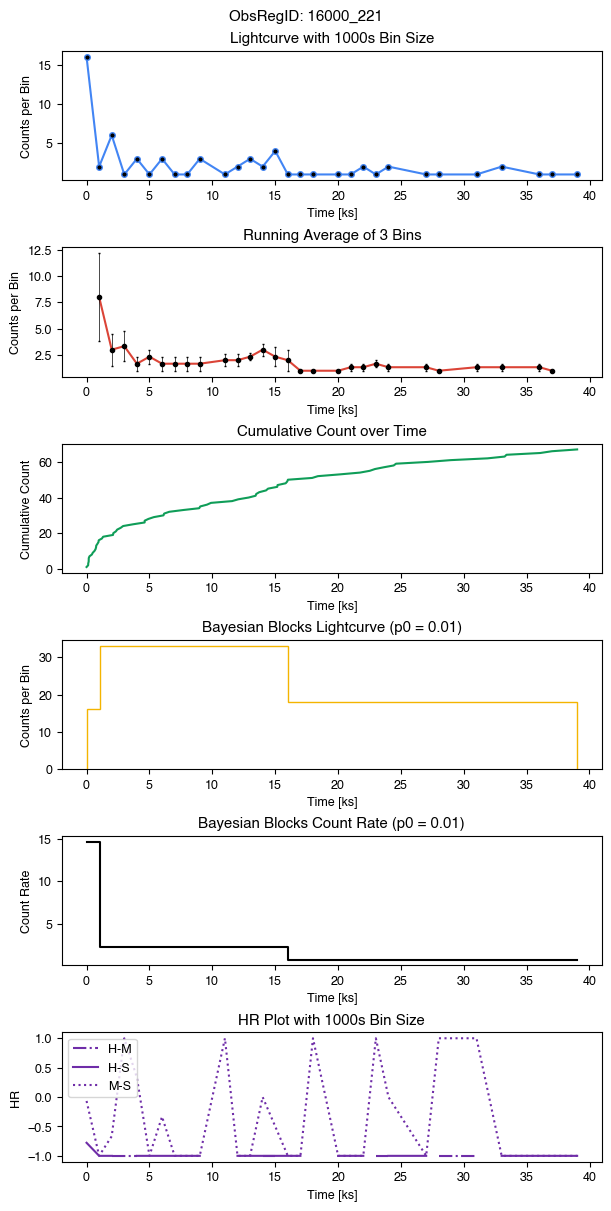

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


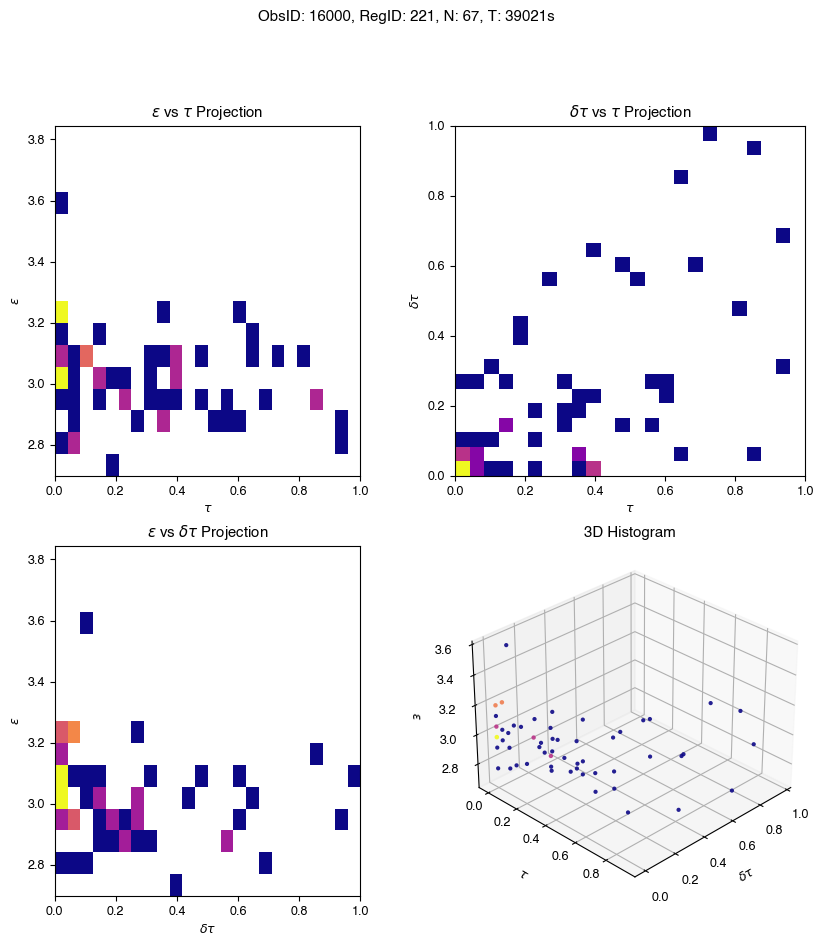

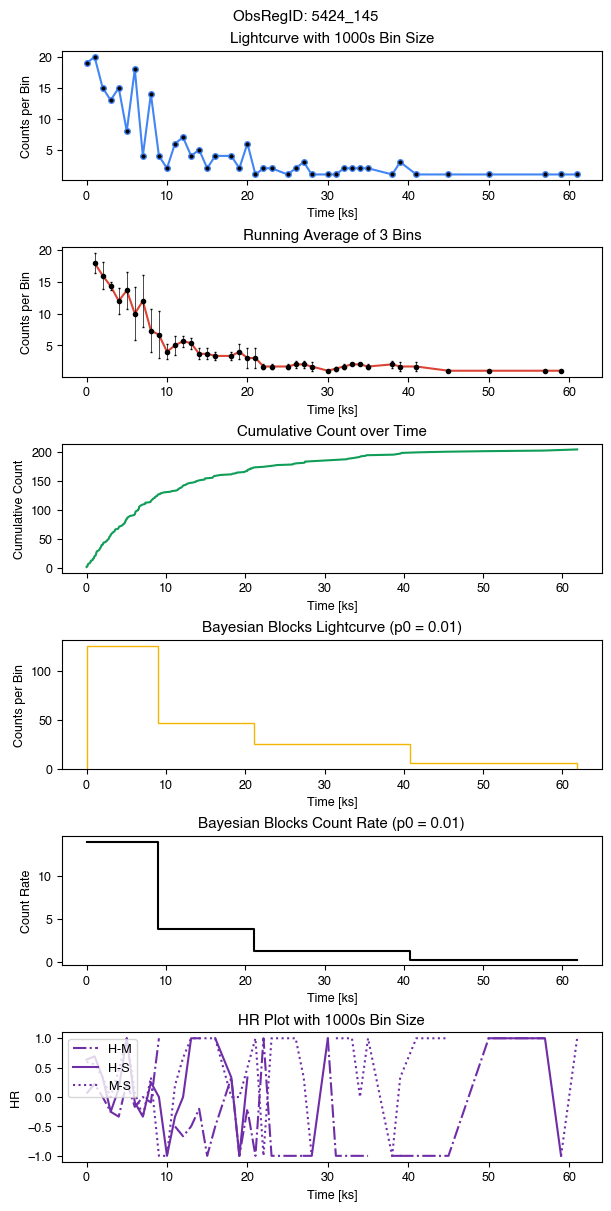

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


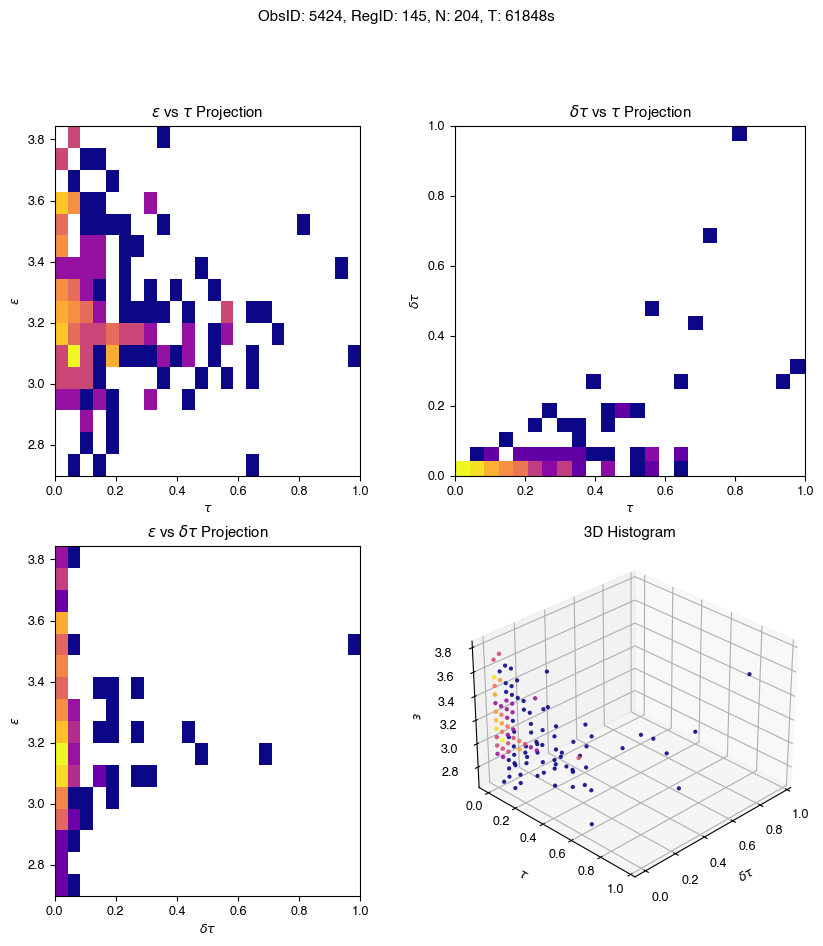

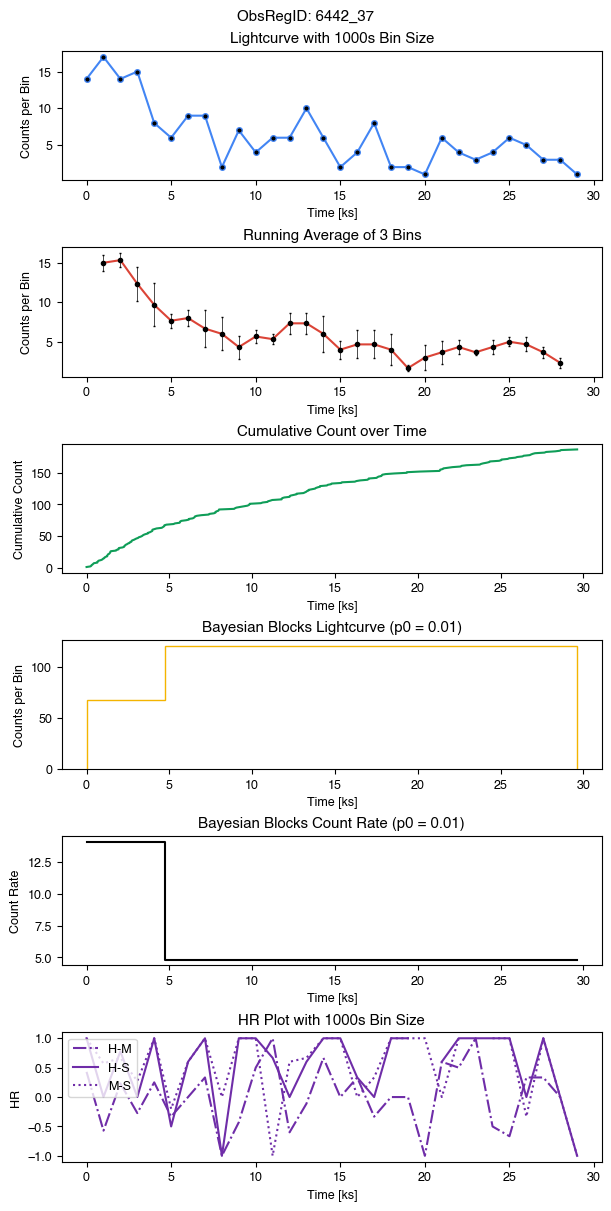

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


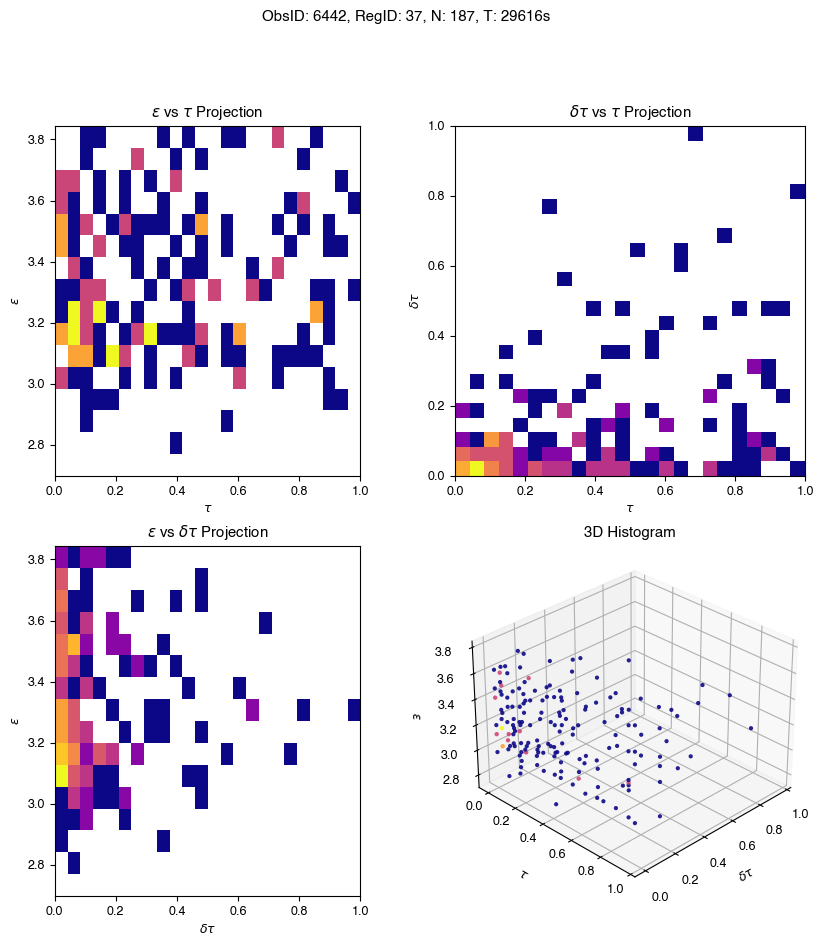

In [135]:
potential_anomalies = df_select['obsreg_id']
keep = potential_anomalies.values[:10]
keep = ['6442_37','11231_250','5424_145','16000_221']
# Image producer
# keep = all_ids[50000:55000]
df_eventfiles_group_filtered = df_eventfiles_group.filter(lambda x: x.name in keep).groupby('obsreg_id')
for id_name, dfi in df_eventfiles_group_filtered:
    dfi.sort_values(by='time', inplace = True) 
    dfi.reset_index(drop=True, inplace = True)
    lightcurveplotter(dfi,id_name,1000,bb_p0=0.01)
    # hist2D(dfi,id_name,16,24,'minmax',True,'plasma',lognorm=True)
    # hist2D(dfi,id_name,16,24,'minmax',True,'plasma',lognorm=False)
    hist3D(dfi,id_name,16,24,24,'minmax',True,'plasma',lognorm=True)
    #hist3D(dfi,id_name,16,24,24,'minmax',True,'plasma',lognorm=False)
    # hist3Dlog(dfi,id_name,16,24,24,'minmax',True,'plasma')

In [128]:
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(potential_anomalies)]
df_properties_anomalies.head(500)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,...,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id
1177,2CXO J002402.8-720449,6.011798,-72.080332,0.710365,0.710152,71.195907,33.438362,TRUE,True,False,...,-0.003123,1.000000,1.000000,1.000000,1.000000,10.0,NaN,68771.355852,ACIS-7,2738_155
2787,2CXO J004210.3+411509,10.542985,41.252737,0.721581,0.714608,91.620836,21.822603,TRUE,False,False,...,0.661462,1.000000,1.000000,0.999964,0.531763,9.0,NaN,3958.594347,ACIS-3,8191_87
8841,2CXO J005200.7+563606,13.003217,56.601725,0.756453,0.739465,121.354189,14.157858,TRUE,False,False,...,0.161774,1.000000,1.000000,1.000000,1.000000,10.0,NaN,61878.368707,ACIS-0,5424_145
11304,2CXO J010344.5-214845,15.935591,-21.812720,1.103559,0.934452,49.882527,7.855560,TRUE,False,False,...,-0.136790,1.000000,1.000000,1.000000,1.000000,10.0,NaN,91786.521093,ACIS-3,13454_56
14032,2CXO J013647.4+154744,24.197872,15.795805,0.712722,0.712298,54.434094,13.192928,TRUE,False,False,...,-0.941287,0.999999,NaN,0.992753,0.996950,8.0,NaN,39549.049694,ACIS-6,16000_221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102891,2CXO J182612.9-130431,276.553797,-13.075521,1.513712,1.028105,27.546213,5.117647,TRUE,False,False,...,0.702686,1.000000,1.000000,0.999153,NaN,9.0,NaN,73884.350910,ACIS-2,7641_63
104009,2CXO J185512.5+013807,283.802405,1.635497,1.345719,0.952738,98.100765,6.254197,TRUE,False,False,...,0.430356,1.000000,0.999951,1.000000,0.932541,9.0,NaN,55461.465466,ACIS-1,11231_250
104650,2CXO J191129.6+045958,287.873703,4.999496,0.798725,0.754634,117.715868,9.937123,TRUE,False,False,...,-0.637726,1.000000,0.997760,0.999997,1.000000,9.0,NaN,58061.757738,ACIS-6,3790_218
107069,2CXO J203015.6+400030,307.565033,40.008555,3.197463,2.371689,94.219270,8.631554,TRUE,False,False,...,0.622736,0.999999,0.999408,0.999863,0.582580,8.0,NaN,29784.333875,ACIS-2,6442_37
